# Data Binning
* Data binning is a data pre-processing technique used to reduce the effects of minor observation errors. The original data values which fall into a given small interval, a bin, are replaced by a value representative of that interval, often a central value (mean or median) or categorical variables.

* Histograms are an example of data binning used in order to observe underlying frequency distributions. They typically occur in one-dimensional space and in equal intervals for ease of visualization.

* Binning is used in machine learning to speed up. The decision-tree boosting method for supervised classification and regression in algorithms such as Microsoft's LightGBM and scikit-learn's Histogram-based Gradient Boosting Classification Tree.

In [2]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Loading data
df=pd.read_csv("multiTimeline.csv")

In [3]:
#top five rows
df.head(5)

,Month,Cupcake
0,2004-01,4
1,2004-02,7
2,2004-03,5
3,2004-04,6
4,2004-05,5


In [4]:
#last five rows
df.tail(5)

,Month,Cupcake
206,2021-03,47
207,2021-04,43
208,2021-05,43
209,2021-06,40
210,2021-07,38


In [5]:
#Getting minimum and maximum of the data column
min_value=df['Cupcake'].min()
max_value=df['Cupcake'].max()
print('min_value :', min_value)
print('max_value :', max_value)

min_value : 4
max_value : 100


In [7]:
#Creating bins of equal width
bins=np.linspace(min_value, max_value, 4)
bins

array([  4.,  36.,  68., 100.])

In [8]:
#Labelling the bins
#4-36 : small
#36-68 : medium
#68-100: big
labels=['small','medium','big']

In [11]:
#Creating new dataframe based on the bins
data1=pd.cut(df['Cupcake'], bins=bins, labels=labels, include_lowest=True)
#include_lowest=True includes lower limit of the bin while assigning categorical variable
#if batch size was 36 it would be considerered as medium not small

In [12]:
data1.head()

0    small
1    small
2    small
3    small
4    small
Name: Cupcake, dtype: category
Categories (3, object): ['small' < 'medium' < 'big']

In [13]:
data1.tail()

206    medium
207    medium
208    medium
209    medium
210    medium
Name: Cupcake, dtype: category
Categories (3, object): ['small' < 'medium' < 'big']

You can see that the new dataframe has categorical values in place of numerical values which are substituted based on binning,

In [39]:
data1.value_counts()

medium    83
small     67
big       61
Name: Cupcake, dtype: int64

(array([67., 83., 61.]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <BarContainer object of 3 artists>)

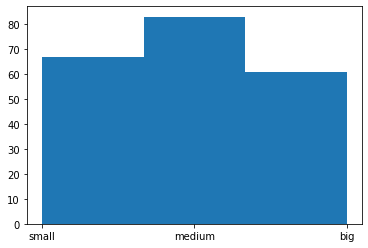

In [22]:
#Plotting the histogram of bins
plt.hist(data1,bins=3)
#setting number of bins=3 since we have three categorical variables created based on binning
#the same binning method is used by matplotlib for plotting the histogram

In [29]:
#Binning based on quantiles :
#here we use quantiles such as quartiles, deciles etc for making bins
labels=['small','medium','big','huge']
data2=pd.qcut(df['Cupcake'], q=4, labels=labels)
#precaution: number of labels should be equal to number of quantiles

In [30]:
data2.head()

0    small
1    small
2    small
3    small
4    small
Name: Cupcake, dtype: category
Categories (4, object): ['small' < 'medium' < 'big' < 'huge']

In [31]:
data2.tail()

206    medium
207    medium
208    medium
209    medium
210    medium
Name: Cupcake, dtype: category
Categories (4, object): ['small' < 'medium' < 'big' < 'huge']

(array([55., 56., 47., 53.]),
 array([0.  , 0.75, 1.5 , 2.25, 3.  ]),
 <BarContainer object of 4 artists>)

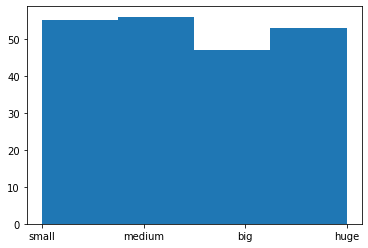

In [38]:
#Plotting histograms with bins
plt.hist(data2, bins=4)

The End